# Credit Card Fraud Detection

DATA: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

## Loading Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

The dataset contains transactions made by credit cards in September 2013 by European cardholders.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. 

Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. 

Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. 

The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. 

Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [2]:
df=pd.read_csv('creditcard.csv')
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


## Understanding the Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.shape

(284807, 31)

Total number of transactions= 284807

Checking null data...

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There are no null values

Let's drop "time" column, unnecessary for our analysis:

In [6]:
df1= df.drop(['Time'], axis=1)

Checking duplicate rows...

In [7]:
df1[df1.duplicated()]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,-0.484688,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,-0.482474,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,-0.243289,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284708,2.018105,0.073226,-1.615154,0.351058,0.333905,-0.676284,0.050474,-0.071028,0.302728,-0.193920,...,-0.306646,-0.841768,0.356773,0.655112,-0.331463,0.144352,-0.069820,-0.039845,1.98,0
284751,2.050734,-0.364010,-2.542843,-0.729357,2.388455,3.318015,-0.479138,0.791559,0.403374,0.093232,...,-0.293363,-0.834802,0.381740,0.698179,-0.264798,0.219275,-0.052131,-0.066940,0.89,0
284775,1.955547,-0.724606,-1.706511,-0.611145,1.710907,3.914215,-1.248690,1.054133,1.314064,-0.150553,...,0.193605,0.690196,0.155951,0.726775,-0.061219,-0.192666,0.060347,-0.042323,12.99,0
284785,0.032887,0.545338,-1.185844,-1.729828,2.932315,3.401529,0.337434,0.925377,-0.165663,-0.386953,...,-0.266113,-0.716336,0.108519,0.688519,-0.460220,0.161939,0.265368,0.090245,1.79,0


In [8]:
len(df1[df1.duplicated()])

9144

There are 9144 duplicate rows, let's drop them:

In [9]:
df1.drop(df1[df1.duplicated()].index, axis=0, inplace=True)

In [10]:
df1.shape

(275663, 30)

In [11]:
df1.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275663 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      275663 non-null  float64
 1   V2      275663 non-null  float64
 2   V3      275663 non-null  float64
 3   V4      275663 non-null  float64
 4   V5      275663 non-null  float64
 5   V6      275663 non-null  float64
 6   V7      275663 non-null  float64
 7   V8      275663 non-null  float64
 8   V9      275663 non-null  float64
 9   V10     275663 non-null  float64
 10  V11     275663 non-null  float64
 11  V12     275663 non-null  float64
 12  V13     275663 non-null  float64
 13  V14     275663 non-null  float64
 14  V15     275663 non-null  float64
 15  V16     275663 non-null  float64
 16  V17     275663 non-null  float64
 17  V18     275663 non-null  float64
 18  V19     275663 non-null  float64
 19  V20     275663 non-null  float64
 20  V21     275663 non-null  float64
 21  V22     27

Let's look at the number of the target variable:

In [13]:
df1['Class'].value_counts()

0    275190
1       473
Name: Class, dtype: int64

Number of Normal (NOT Fraudulent Transaction): 275190

Number of Fraudulent: 473

#### The dataset is unfortunately ***unbalanced*** dataset

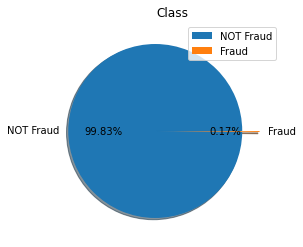

In [14]:
explode = [0.2, 0]
labels = ["NOT Fraud", "Fraud"]
plt.pie(df1['Class'].value_counts(), labels = labels, explode = explode, shadow=True, autopct='%1.2f%%')
plt.title("Class")
plt.legend()
plt.show()

Only 0.17% of transactions are fraudulent ---> **unbalanced**

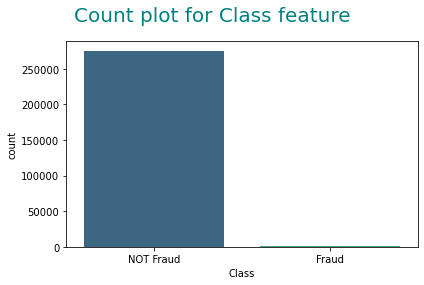

In [16]:
plt.suptitle('Count plot for Class feature', fontsize = 20, color= 'teal')
sns.countplot(x =df1["Class"], palette= 'viridis')

x= ["NOT Fraud", "Fraud"]
default_x_ticks = range(len(x))
plt.xticks(default_x_ticks, x)

plt.tight_layout()
plt.show()

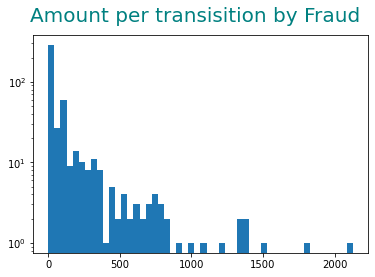

In [17]:
plt.suptitle('Amount per transisition by Fraud', fontsize = 20, color= 'teal')
bins =50
plt.hist(df1[df1['Class']==1].Amount, bins= bins)
plt.yscale('log')
plt.show()

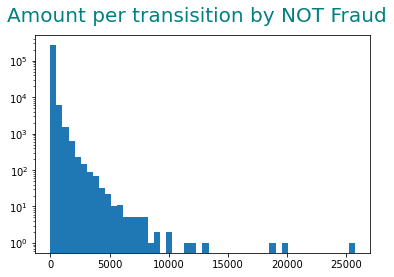

In [18]:
plt.suptitle('Amount per transisition by NOT Fraud', fontsize = 20, color= 'teal')
bins =50
plt.hist(df1[df1['Class']==0].Amount, bins= bins)
plt.yscale('log')
plt.show()

## Handling Outliers

In [19]:
float_cols= [cname for cname in df1.columns 
                   if df1[cname].dtype in ["float"]]
float_cols

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

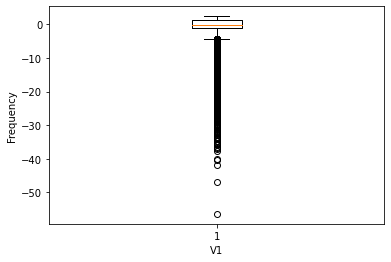

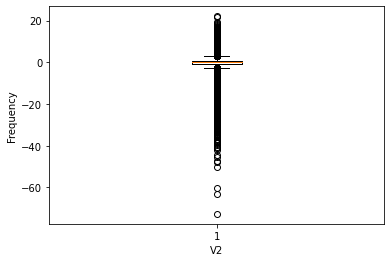

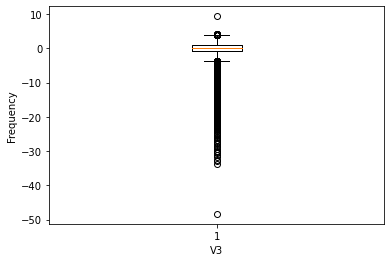

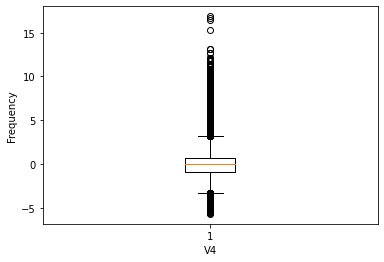

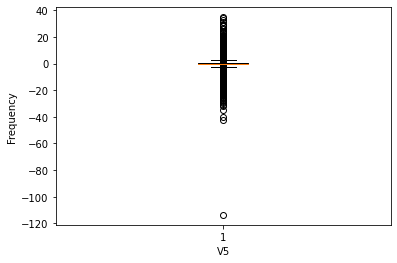

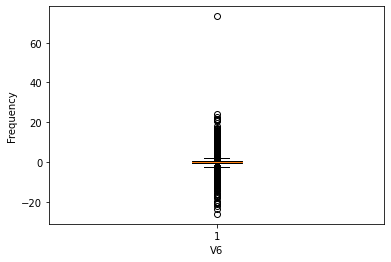

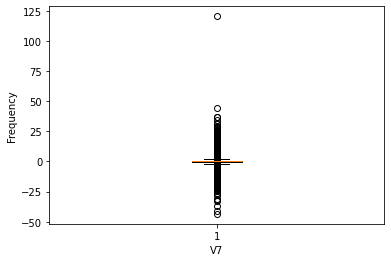

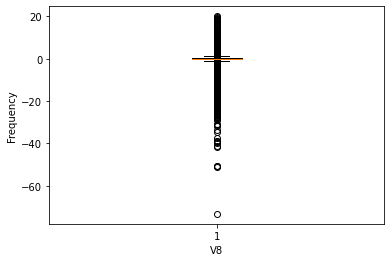

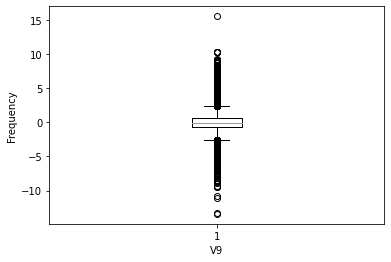

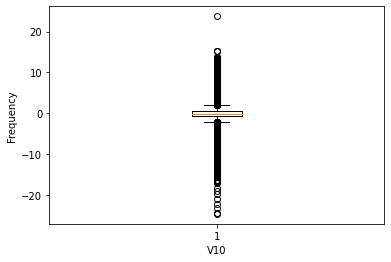

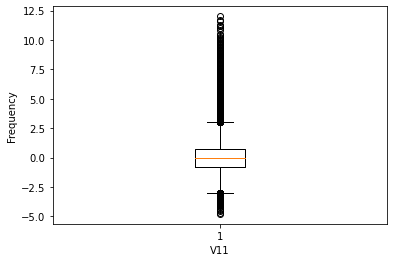

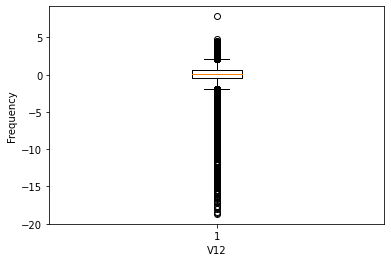

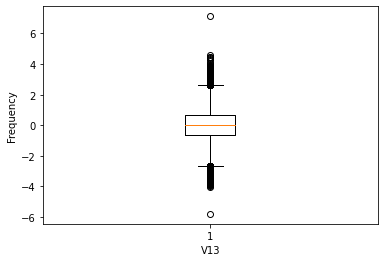

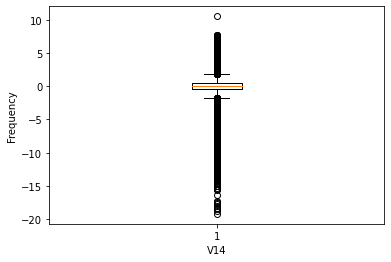

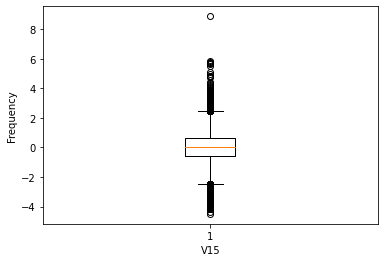

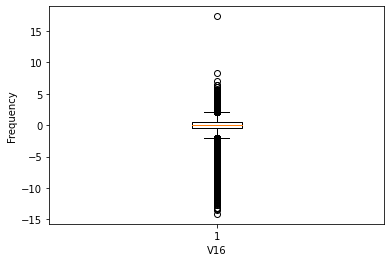

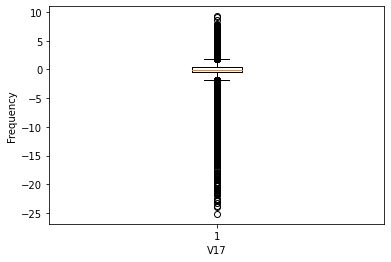

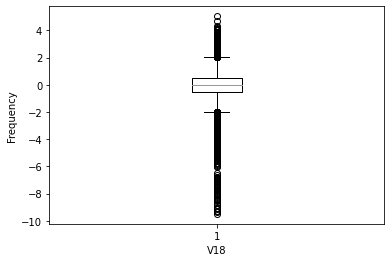

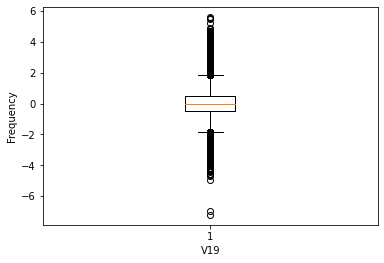

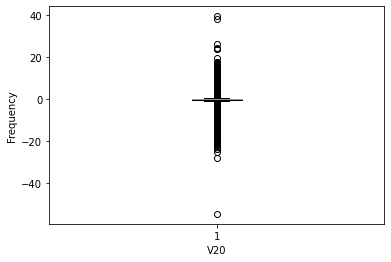

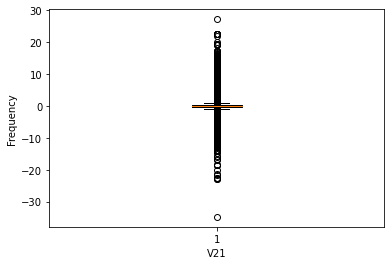

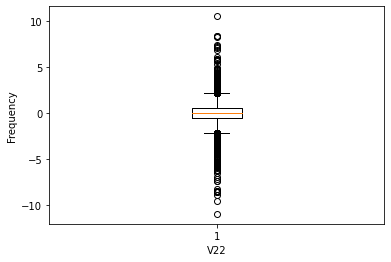

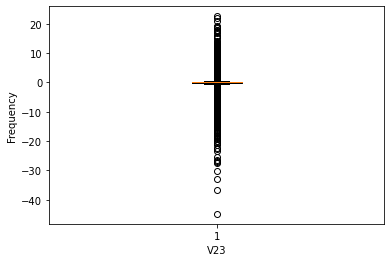

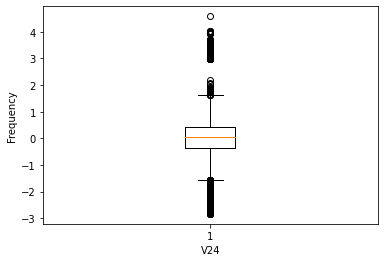

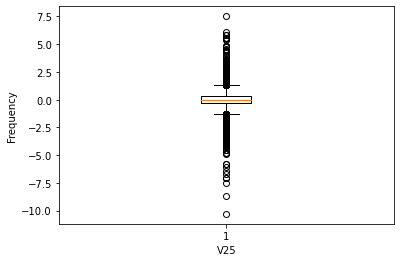

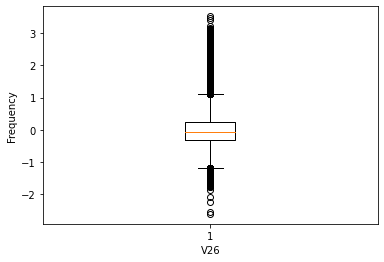

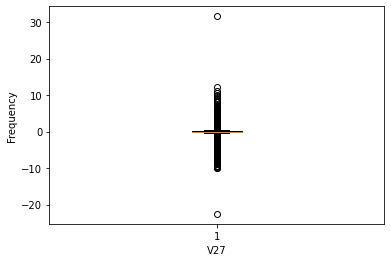

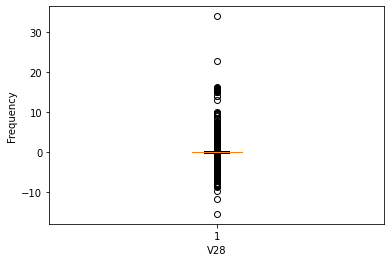

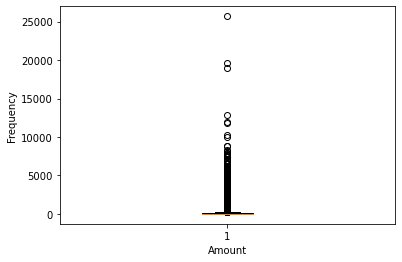

In [20]:
for i in float_cols:
    plt.figure()
    plt.tight_layout()
    plt.gca().set(xlabel= i, ylabel='Frequency')
    plt.boxplot(df1[i])

In [21]:
#Find the outliers records which fall with +/- 5% boundaries 

Q1 = df1.quantile(0.05)
Q3 = df1.quantile(0.95)
IQR = Q3 - Q1

print("Number of outliers for entire dataset = ", len(df1[((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).any(axis=1)]))

Number of outliers for entire dataset =  13470


In [22]:
outliers_index= df1[((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)].index
outliers_index

Int64Index([     7,     18,     51,     82,     89,    132,    146,    150,
               162,    164,
            ...
            284606, 284631, 284649, 284672, 284714, 284721, 284742, 284772,
            284795, 284802],
           dtype='int64', length=13470)

It is inevitable to have outliers in the data set. Dropping outliers can make the model less reliable. we also have imbalanced data (Only 0.17% of transactions are fraudulent.). 

So, I decided that I will keep them in the dataset.

## Splitting the data into train and test sets

In [23]:
X= df1.drop(["Class"], axis=1)
y= df1.Class

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((192964, 29), (82699, 29), (192964,), (82699,))

Data has 28 features transformed with PCA, but the Amount is the original one. We will scale only this variable.

In [26]:
from sklearn.preprocessing import StandardScaler


X_train["Amount"]= StandardScaler().fit_transform(X_train["Amount"].values.reshape(-1, 1))
X_test["Amount"]= StandardScaler().fit_transform(X_test["Amount"].values.reshape(-1, 1))

## Model building

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

Our dataset is an unbalanced dataset. Probably the accuracy will be very high, for now, we will only use 2 models to show this.

In [28]:
models = {
    'K-Nearest Neighbors' : KNeighborsClassifier(),
    'Logistic Regression' : LogisticRegression(),
    #'Support Vector Machine' : SVC(),
    #'Random Forest' : RandomForestClassifier(),
    #'Gradient Boosting' : GradientBoostingClassifier()    
}

In [29]:
%%time
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f'{name} trained')

K-Nearest Neighbors trained
Logistic Regression trained
CPU times: total: 4.27 s
Wall time: 2.33 s


## Model evaluation

In [30]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix as CM
from sklearn.metrics import classification_report

In [31]:
%%time
for name in models:
    acc_score= round(accuracy_score(y_test, models.get(name).predict(X_test)), 3)
    print(f'{name} accuracy score :  {acc_score}')

K-Nearest Neighbors accuracy score :  0.999
Logistic Regression accuracy score :  0.999
CPU times: total: 3min 34s
Wall time: 1min 10s


As we predicted, The accuracy of the models we built is 0.999. ***We can say that our models run correctly?***

In [32]:
for name in models:
    print(f'{name} classification report')
    print("-------------------------------")
    print(classification_report(y_test, models.get(name).predict(X_test)))
    print("******************************")
    print(" ")

K-Nearest Neighbors classification report
-------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     82563
           1       0.89      0.77      0.83       136

    accuracy                           1.00     82699
   macro avg       0.94      0.89      0.91     82699
weighted avg       1.00      1.00      1.00     82699

******************************
 
Logistic Regression classification report
-------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     82563
           1       0.85      0.59      0.70       136

    accuracy                           1.00     82699
   macro avg       0.93      0.79      0.85     82699
weighted avg       1.00      1.00      1.00     82699

******************************
 


Let's check the Confusion Matrices:

K-Nearest Neighbors ConfusionMatrix


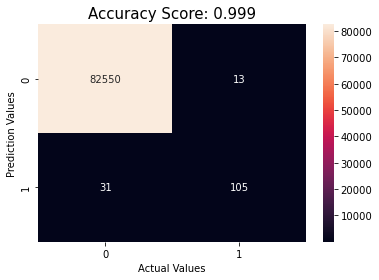

******************************
 
Logistic Regression ConfusionMatrix


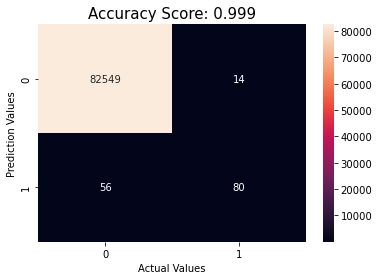

******************************
 


In [33]:
for name in models:
    print(f'{name} ConfusionMatrix')
    predictions= models.get(name).predict(X_test)
    score = round(accuracy_score(y_test, models.get(name).predict(X_test)), 3)
    confusionMatrix = CM(y_test, models.get(name).predict(X_test))
    sns.heatmap(confusionMatrix, annot=True, fmt=".0f")
    plt.xlabel('Actual Values')
    plt.ylabel('Prediction Values')
    plt.title('Accuracy Score: {0}'.format(score), size = 15)
    plt.show()
    print("******************************")
    print(" ")

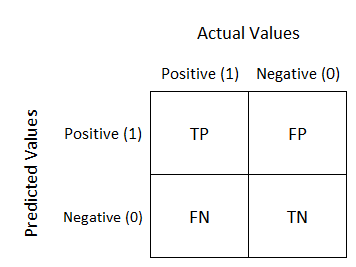

For example, let's handle the Confusion Matrix of Logistic Regression Model:

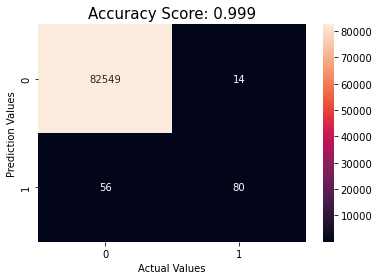

for Normal Class (NOT Fraudulent Transaction), there are 82563 predicitons with 82549 (TruePositive) and 11 (FalsePositive)

and

for Fraud Class, there are 136 predicitons with 56 (FalseNegative) and 80 (TrueNegative).

The models can predict with 0.99 accuracies, but when we look at the Confusion Matrix, the rate of false predictions in the Fraud class is quite high. Actually, the model correctly predicts the non-fraud class with 0.99 accuracies. Because our dataset is an imbalanced dataset (Only 0.17% of transactions are fraudulent).

Similarly, let's handle the Logistic Regression Model's classification report:

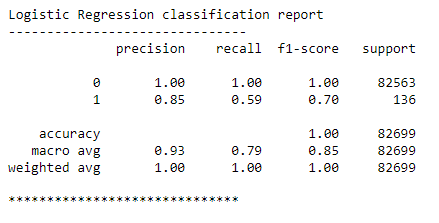

As can be seen in the above report, the metrics of class=1 are low. 

Although our model has a high accuracy, the accuracy is only reflecting class=0.

Imbalanced datasets are those where there is a severe skew in the class distribution, such as 1:100 or 1:1000 examples in the minority class to the majority class.

This bias in the training dataset can influence many machine learning algorithms, leading some to ignore the minority class entirely. This is a problem as it is typically the minority class on which predictions are most important.

One approach to addressing the problem of class imbalance is to randomly resample the training dataset. The two main approaches to randomly resampling an imbalanced dataset are to delete examples from the majority class, called undersampling, and to duplicate examples from the minority class, called oversampling.

Now let's handle how to deal with this problem:

## Resampling

One of the ways to deal with this problem is **Resampling**.

We can change the dataset that we use to build our predictive model to have more balanced data. This change is called sampling our dataset and there are two main methods that we can use to even up the classes:

We can add copies of instances from the under-represented class called **over-sampling** (or more formally sampling with replacement)

or

We can delete instances from the over-represented class, called **under-sampling**.

These approaches are often very easy to implement and fast to run. They are an excellent starting point.

### Over-sampling

Random oversampling involves randomly duplicating examples from the minority class and adding them to the training dataset.

Examples from the training dataset are selected randomly with replacements. This means that examples from the minority class can be chosen and added to the new “more balanced” training dataset multiple times; they are selected from the original training dataset, added to the new training dataset, and then returned or “replaced” in the original dataset, allowing them to be selected again.

Random oversampling can be implemented using the ***RandomOverSampler*** class.

Let's check our training set before over-sampling:

In [34]:
y_train.value_counts()

0    192627
1       337
Name: Class, dtype: int64

Let's implement Random OverSampling:

In [35]:
pip install -U imbalanced-learn

In [36]:
from imblearn.over_sampling import RandomOverSampler

In [37]:
random_over_sample = RandomOverSampler(sampling_strategy='minority')
X_random_over, y_random_over = random_over_sample.fit_resample(X_train, y_train)

Let's check our training set after over-sampling:

In [38]:
y_random_over.value_counts()

0    192627
1    192627
Name: Class, dtype: int64

In [45]:
LR_model= models.get('Logistic Regression')

In [46]:
LR_model.fit(X_random_over, y_random_over)
y_pred_LR = LR_model.predict(X_test)

accuracy_LR = accuracy_score(y_test, y_pred_LR)
print("Accuracy: %.3f%%" % (accuracy_LR))

Accuracy: 0.973%


<AxesSubplot:>

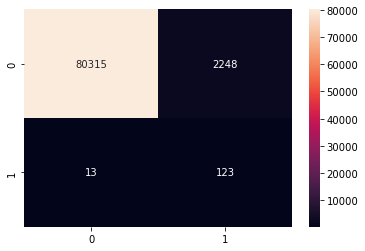

In [47]:
confusionMatrix_LR = CM(y_test, LR_model.predict(X_test))
sns.heatmap(confusionMatrix_LR, annot=True, fmt=".0f")

In [49]:
print(classification_report(y_test, LR_model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     82563
           1       0.05      0.90      0.10       136

    accuracy                           0.97     82699
   macro avg       0.53      0.94      0.54     82699
weighted avg       1.00      0.97      0.98     82699



After Random Oversampling, the accuracy of the model decreased to 0.973 (not a significant decrease, but...).

Looking at the Confusion Matrix and Classification report;

According to the first model, the prediction of the Non-fraud class (class=0) has decreased, but there is also an increase in the recall metric of class=1, which means that the rate of predicting class=1 of the model increased.

### Under-sampling

Random undersampling involves randomly selecting examples from the majority class to delete from the training dataset.

This has the effect of reducing the number of examples in the majority class in the transformed version of the training dataset. This process can be repeated until the desired class distribution is achieved, such as an equal number of examples for each class.

This approach may be more suitable for those datasets where there is a class imbalance although a sufficient number of examples in the minority class, such a useful model can be fit.

The random undersampling technique can be implemented using the ***RandomUnderSampler*** imbalanced-learn class.

Let's check our training set before under-sampling:

In [50]:
y_train.value_counts()

0    192627
1       337
Name: Class, dtype: int64

Let's implement Random UnderSampling:

In [51]:
from imblearn.under_sampling import RandomUnderSampler

In [52]:
random_under_sample = RandomUnderSampler()
X_random_under, y_random_under = random_under_sample.fit_resample(X_train, y_train)

Let's check our training set after under-sampling:

In [53]:
y_random_under.value_counts()

0    337
1    337
Name: Class, dtype: int64

In [54]:
LR_model.fit(X_random_under, y_random_under)
y_pred_LR_under = LR_model.predict(X_test)

accuracy_LR_under = accuracy_score(y_test, y_pred_LR_under)
print("Accuracy: %.3f%%" % (accuracy_LR_under))

Accuracy: 0.972%


<AxesSubplot:>

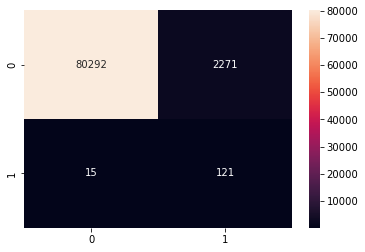

In [55]:
confusionMatrix_LR_under = CM(y_test, LR_model.predict(X_test))
sns.heatmap(confusionMatrix_LR_under, annot=True, fmt=".0f")

In [56]:
print(classification_report(y_test, LR_model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     82563
           1       0.05      0.89      0.10       136

    accuracy                           0.97     82699
   macro avg       0.53      0.93      0.54     82699
weighted avg       1.00      0.97      0.98     82699



### Combining Random Oversampling and Undersampling

In [67]:
# define oversampling strategy
over = RandomOverSampler()
# fit and apply the transform
X_random_COM, y_random_COM = over.fit_resample(X_train, y_train)
# define undersampling strategy
under = RandomUnderSampler()
# fit and apply the transform
X_random_COM, y_random_COM = under.fit_resample(X_train, y_train)

In [68]:
# define pipeline
from imblearn.pipeline import Pipeline

steps = [('o', over), ('u', under), ('m', LogisticRegression())]
pipeline = Pipeline(steps=steps)

In [69]:
pipeline.fit(X_random_COM, y_random_COM)
y_pred_LR_COM = LR_model.predict(X_test)

accuracy_LR_COM = accuracy_score(y_test, y_pred_LR_COM)
print("Accuracy: %.3f%%" % (accuracy_LR_COM))

Accuracy: 0.982%


In [70]:
print(classification_report(y_test, pipeline.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     82563
           1       0.05      0.90      0.09       136

    accuracy                           0.97     82699
   macro avg       0.52      0.93      0.54     82699
weighted avg       1.00      0.97      0.98     82699



### Cross Validation

In [71]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring="recall", cv=cv, n_jobs=-1)
score = np.mean(scores)
print('Score: %.3f' % score)

Score: 0.905


Similarly, we can apply other classification techniques (Random Forest, XGB etc.)

Thanks for reading 😀

References:

https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/

https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/